The aim is to use the Adventure Works Cycles customer data to create a classification model that predicts whether or not a customer will purchase a bike.
The model should predict bike purchasing for new customers for whom no information about average monthly spend or previous bike purchases is available.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
%matplotlib inline

In [2]:
# loading .csv dataset files
customer_info = pd.read_csv('dataset/input/AdvWorksCusts.csv')
customer_spending = pd.read_csv('dataset/input/AW_AveMonthSpend.csv')
customer_has_bike= pd.read_csv('dataset/input/AW_BikeBuyer.csv')

Cleaning the data

In [3]:
#Showing Current 
print(customer_info.shape)
print(customer_info.CustomerID.unique().shape)

(16421, 23)
(16404,)


In [4]:
customer_info.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(customer_info.shape)
print(customer_info.CustomerID.unique().shape)


(16404, 23)
(16404,)


In [5]:
print(customer_spending.shape)
print(customer_spending.CustomerID.unique().shape)

(16421, 2)
(16404,)


In [6]:
customer_spending.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(customer_spending.shape)
print(customer_spending.CustomerID.unique().shape)

(16404, 2)
(16404,)


In [7]:
print(customer_has_bike.shape)
print(customer_has_bike.CustomerID.unique().shape)


(16408, 2)
(16404,)


In [8]:
customer_has_bike.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(customer_has_bike.shape)
print(customer_has_bike.CustomerID.unique().shape)

(16404, 2)
(16404,)


In [9]:
# check for missing values
(customer_has_bike.astype(np.object).isnull()).any()

CustomerID    False
BikeBuyer     False
dtype: bool

In [10]:
(customer_spending.astype(np.object).isnull()).any()

CustomerID       False
AveMonthSpend    False
dtype: bool

In [11]:
(customer_info.astype(np.object).isnull()).any()

CustomerID              False
Title                    True
FirstName               False
MiddleName               True
LastName                False
Suffix                   True
AddressLine1            False
AddressLine2             True
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
dtype: bool

Check if their are any missing values, or any key features missing.
Duplicates are then removed.
The dataset will now be analysed.

In [12]:
customer_info.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


In [13]:
customer_spending.describe()

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.392892
std,5340.370705,27.270023
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


In [14]:
customer_has_bike.describe()

,CustomerID,BikeBuyer
count,16404.000000,16404.000000
mean,20240.143136,0.332541
std,5340.370705,0.471138
min,11000.000000,0.000000
25%,15617.750000,0.000000
50%,20231.500000,0.000000
75%,24862.250000,1.000000
max,29482.000000,1.000000


In [15]:
customer_has_bike.BikeBuyer.value_counts(normalize=True)

0    0.667459
1    0.332541
Name: BikeBuyer, dtype: float64

The bike buyer column will be merged into the customer information records.

In [16]:
combined = customer_info.merge(customer_has_bike, on='CustomerID', how='left')
combined.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,1


Plot box is used to visualise the classification for numerical values.
We will use the plot box to determine whether any major differences in quartiles between people who bought and haven't bought any bikes, and whether this data is useful.

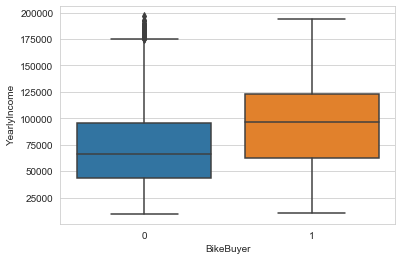

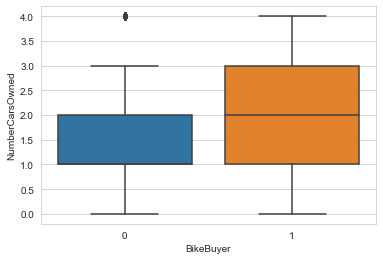

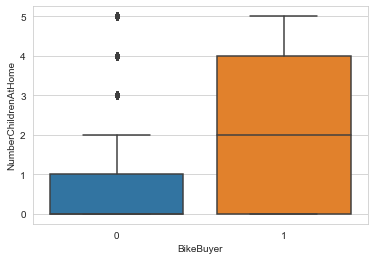

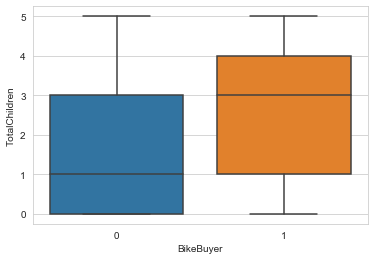

In [17]:
# define function for plotting box plot
def plot_box(combined, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=combined)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

cols = ['YearlyIncome','NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']       
plot_box(combined, cols)

It seems the have a decent difference is quartiles.

Check Categorical Features: to determine whether there are any great pointers to the BikerBuyer Category using barplots. 

In [18]:
is_bike_buyer= combined.BikeBuyer==1
bike_buyers = combined[is_bike_buyer]
print(bike_buyers.shape)
is_non_bike_buyer= combined.BikeBuyer==0
non_bike_buyers = combined[is_non_bike_buyer]
print(non_bike_buyers.shape)

(5455, 24)
(10949, 24)


In [19]:
# bar plot function for non numeric features
# plot bar plot for bike buyer counts

def plt_bar_plot(cat_cols):
    combined['dummy'] = np.ones(shape = combined.shape[0])
    for col in cat_cols:
        print(col)
        counts = combined[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
        temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
        temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
        temp.plot.bar(x=col,y ='dummy')

        plt.title('Counts for ' + col + '\n non bike buyer')
        plt.ylabel('count')
        temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
        temp.plot.bar(x=col,y ='dummy')

        plt.title('Counts for ' + col + '\n bike buyer')
        plt.ylabel('count')
        plt.show()

Occupation


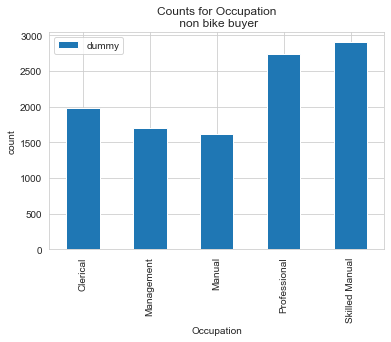

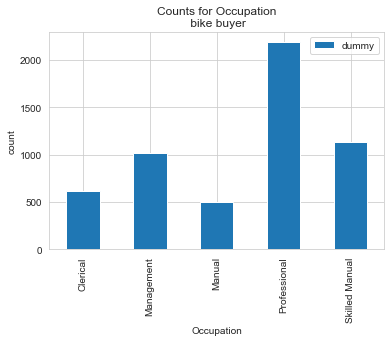

Gender


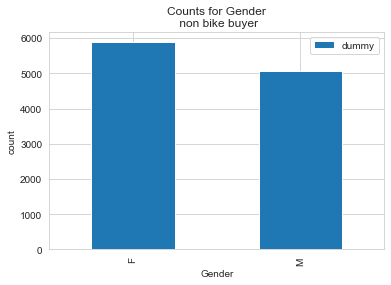

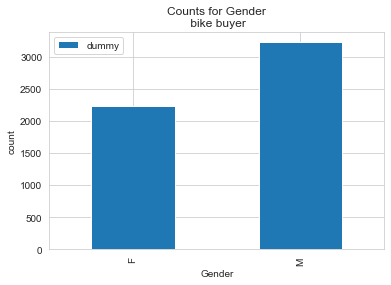

MaritalStatus


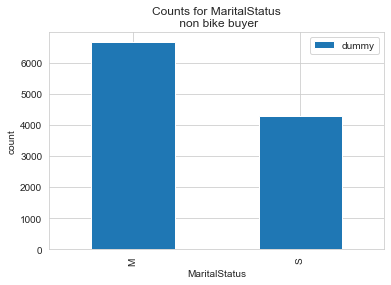

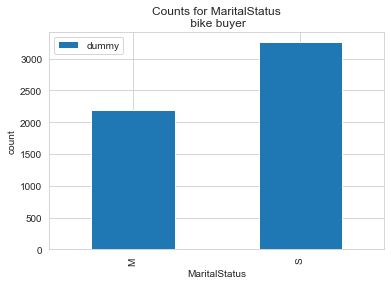

In [20]:
cols = ['Occupation', 'Gender','MaritalStatus']
plt_bar_plot(cols)

Looks like MaritalStatus, Gender and Occupation are good features as well

In [21]:
# try feature generation - hasChildren
has_child_at_home = []
def generate_has_child_at_home(customer_info, has_child_at_home):
    for index, row in customer_info.iterrows():
        if row.NumberChildrenAtHome>0:
            has_child_at_home.append('Y')
        else:
            has_child_at_home.append('N')
    return has_child_at_home
        
combined['hasChildAtHome'] = generate_has_child_at_home(customer_info, has_child_at_home)
combined[['hasChildAtHome','NumberChildrenAtHome']].head()


,hasChildAtHome,NumberChildrenAtHome
0,N,0
1,Y,3
2,Y,3
3,N,0
4,Y,5


hasChildAtHome


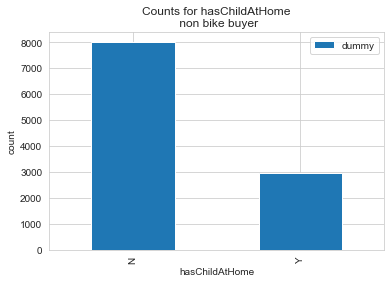

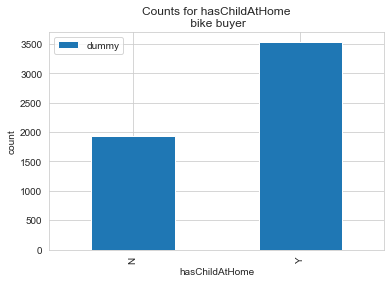

In [22]:
cols = ['hasChildAtHome']
plt_bar_plot(cols)

hasChildAtHome seems to be a good indicator of if a bike is bought or not.

In [23]:
features_chosen = ['YearlyIncome','NumberCarsOwned', 'Occupation', 'Gender','MaritalStatus','hasChildAtHome']
features = combined[features_chosen]
features.head()

,YearlyIncome,NumberCarsOwned,Occupation,Gender,MaritalStatus,hasChildAtHome
0,137947,0,Professional,M,M,N
1,101141,1,Professional,M,S,Y
2,91945,1,Professional,M,M,Y
3,86688,1,Professional,F,S,N
4,92771,4,Professional,F,S,Y


Prepare data for sickit learn classification.
1. Will encode categorical variables using one hot encoding.
2. Will convert features and labels to numpy arrays.

In [24]:
labels = np.array(combined.BikeBuyer)
print(labels)

[0 1 0 ... 1 0 0]


In [25]:
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

def encode_string(cat_features):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

In [26]:
def encode_cat_features(features):
    cat_features = [ 'Gender','MaritalStatus','hasChildAtHome']
    f = encode_string(features['Occupation'])
    for cat in cat_features:
        enc = encode_string(features[cat])
        f = np.concatenate([f,enc],1)
    return f

In [27]:
numeric_features = np.array(combined[['YearlyIncome','NumberCarsOwned']])

In [28]:
encoded_features = encode_cat_features(features)

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence t

In [29]:
features = np.concatenate([encoded_features,numeric_features], 1)

In [30]:
features.shape
features[3,:13]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
       0.0000e+00, 8.6688e+04, 1.0000e+00])

Conversion and encoding done now to split and train data.

In [31]:
# Time to split and train
nr.seed(9988)
indx = range(features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
X_train[:2]

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 6.16210e+04, 0.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.18286e+05, 1.00000e+00]])

In [32]:
# Time to scale, this would most especially be useful in yearly income
scaler = preprocessing.StandardScaler().fit(X_train[:,11:])
X_train[:,11:] = scaler.transform(X_train[:,11:])
X_test[:,11:] = scaler.transform(X_test[:,11:])
X_train[:2]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        , -0.41709616, -1.31702532],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.00791474, -0.43948071]])

Features are now prepared, we will train with logistic regression


In [33]:
# Due to class imbalance for bike buyers and non bike buyers we wil be making use of class weight parameters
logistic_mod = linear_model.LogisticRegression(class_weight="balanced") 

In [34]:
# perform cross validation for the regularization parameter C
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(3456)
param_grid = {"C": [0.1, 1, 10, 100, 1000]}
clf = ms.GridSearchCV(estimator = logistic_mod, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(features, labels)
clf.best_estimator_.C

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/l

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/l

0.1

In [35]:
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, features, labels, 
                                 cv = outside) # Use the outside folds
print('Mean Performance Metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the Metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by CV Fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/l

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/l

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/l

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/l

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/l

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/l

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/l

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/l

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/l

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/l

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/l

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/l

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/l

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/l

Mean Performance Metric = 0.671
SDT of the Metric       = 0.020
Outcomes by CV Fold
Fold  1    0.641
Fold  2    0.658
Fold  3    0.672
Fold  4    0.693
Fold  5    0.663
Fold  6    0.676
Fold  7    0.645
Fold  8    0.667
Fold  9    0.676
Fold 10    0.714


/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
# logistic regression with weight more on the bike buyer =1 case due to class imbalance {0:1,1:2}
logistic_mod = linear_model.LogisticRegression(C=clf.best_estimator_.C, class_weight="balanced") 
logistic_mod.fit( X_train, y_train)
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.001301]
[[ 0.21819668 -0.87140004  0.44106778  0.00534237  0.20809421 -0.22383276
   0.22513376 -0.73570566  0.73700666 -0.8706994   0.8720004   0.89889977
  -0.001091  ]]


In [37]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.77491235 0.22508765]
 [0.92682376 0.07317624]
 [0.67017702 0.32982298]
 [0.5998997  0.4001003 ]
 [0.46658522 0.53341478]
 [0.79845157 0.20154843]
 [0.82173511 0.17826489]
 [0.85402522 0.14597478]
 [0.35001463 0.64998537]
 [0.61910757 0.38089243]
 [0.78937276 0.21062724]
 [0.52919287 0.47080713]
 [0.83585209 0.16414791]
 [0.76717502 0.23282498]
 [0.90919605 0.09080395]]


In [38]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
threshold = 0.51
scores = score_model(probabilities, threshold)
print(np.array(scores[:18]))
print(y_test[:18])

[0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [39]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

In [40]:
print_metrics(y_test, scores)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive       157                49
Actual negative        32                62

Accuracy  0.73
 
           Positive      Negative
Num case      206            94
Precision    0.83          0.56
Recall       0.76          0.66
F1           0.79          0.60


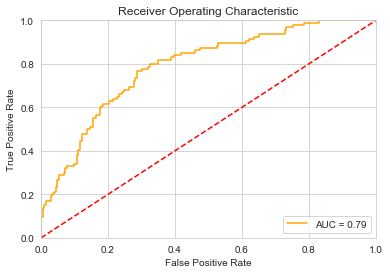

In [41]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)    

Lets try random forests with balanced arguement

First we do cross validation to choose optimal hyperparameters

In [42]:
features.shape

(16404, 13)

In [43]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {"max_features": [2, 3, 5, 10, 13], "min_samples_leaf":[3, 5, 10, 20]}
nr.seed(3456)
rf_clf = RandomForestClassifier(class_weight = "balanced")
nr.seed(4455)
rf_clf = ms.GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
rf_clf.fit(features, labels)
print(rf_clf.best_estimator_.max_features)
print(rf_clf.best_estimator_.min_samples_leaf)

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

3
20


In [44]:
nr.seed(1115)
rf_mod = RandomForestClassifier(class_weight = "balanced", 
                                max_features = rf_clf.best_estimator_.max_features, 
                                min_samples_leaf = rf_clf.best_estimator_.min_samples_leaf) 
rf_mod.fit(X_train, y_train)
probabilities = rf_mod.predict_proba(X_test)
scores = score_model(probabilities, 0.54)
print_metrics(y_test, scores)     

                 Confusion matrix
                 Score positive    Score negative
Actual positive       159                47
Actual negative        36                58

Accuracy  0.72
 
           Positive      Negative
Num case      206            94
Precision    0.82          0.55
Recall       0.77          0.62
F1           0.79          0.58


/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


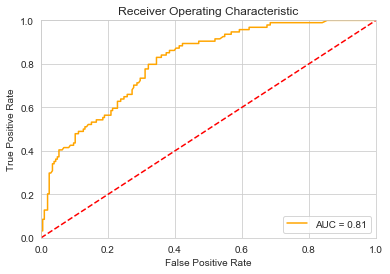

In [45]:
  plot_auc(y_test, probabilities)    

Random Forest classifier does a better job of predicting on the different test sets, will make use of this model.

In [46]:
# import final test data
final = pd.read_csv('dataset/input/AW_test.csv')
print(final.shape)
print(final.CustomerID.unique().shape)

(500, 23)
(500,)


In [47]:
final.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


In [48]:
final['hasChildAtHome'] = generate_has_child_at_home(final,[])

In [49]:
final_features = final[features_chosen]
final_features.head()

,YearlyIncome,NumberCarsOwned,Occupation,Gender,MaritalStatus,hasChildAtHome
0,86931,2,Management,F,S,N
1,100125,2,Skilled Manual,M,M,Y
2,103985,2,Management,F,M,N
3,127161,0,Skilled Manual,M,M,N
4,21876,1,Manual,F,M,Y


In [50]:
numeric_final_features = np.array(final_features[['YearlyIncome','NumberCarsOwned']])
encoded_final_features = encode_cat_features(final_features)
final_features = np.concatenate([encoded_final_features,numeric_final_features], 1)
final_features[3,:13]

/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Volumes/OMEN 2.0/Projects/AdventureWorks/venv/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence t

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.27161e+05, 0.00000e+00])

In [51]:
final_features[:,11:] = scaler.transform(final_features[:,11:])
final_features[:2]

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.21939949, 0.43806391],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 0.55120208, 0.43806391]])

In [52]:
probabilities = rf_mod.predict_proba(final_features)
scores = score_model(probabilities, 0.54)

In [53]:
print(scores)

[0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0
 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1
 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1
 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1
 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1
 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1
 1 1 1 0 0 1 0 0 1 1 1 1 

In [54]:
np.savetxt('dataset/output/results/classification_results.csv', scores, delimiter=',',fmt='%i')